# Lab  #3

Student Name: Rayyan Bilal

Student ID: 501053067

Video demo: https://youtu.be/0B6bqWmcVfc

Percentage of class 0: 65.36796536796537
Percentage of class 1: 34.63203463203463
Number of missing values: 0
Number of categorical variables: 1
Maximum correlation: 1.0
Features with Maximum Correlation:
famhist_Absent   famhist_Present    1.000000
famhist_Present  famhist_Absent     1.000000
adiposity        obesity            0.716556
obesity          adiposity          0.716556
age              adiposity          0.625954
dtype: float64


<ipython-input-19-8b261f048f78>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


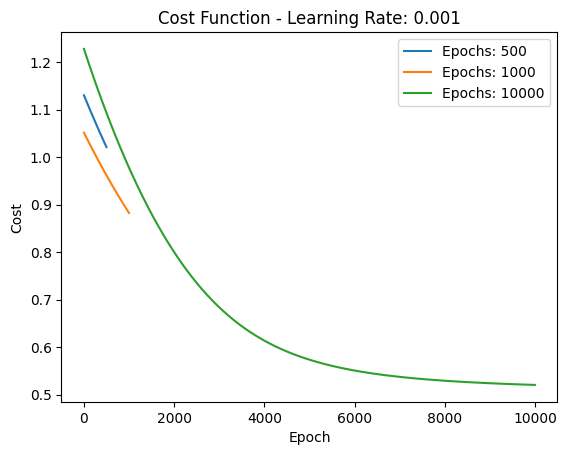

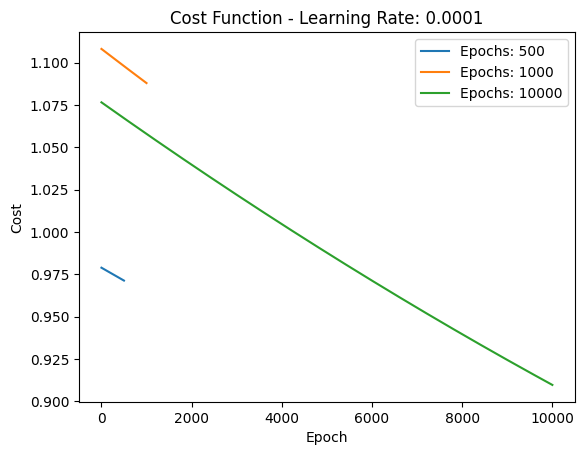

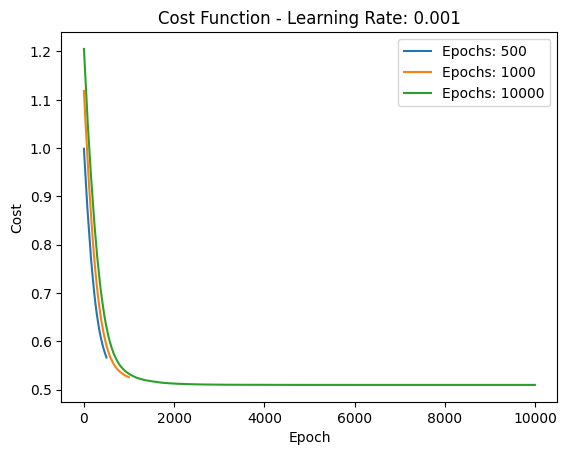

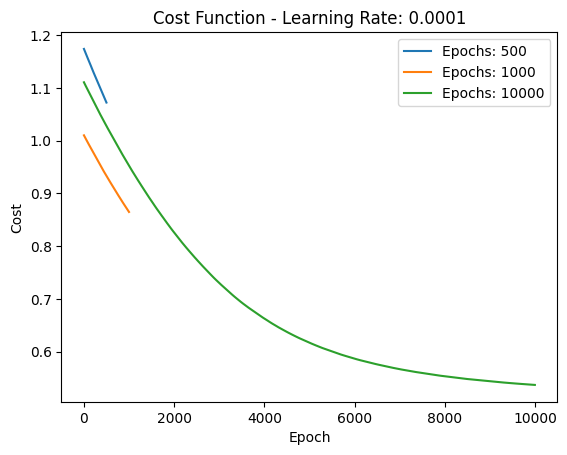

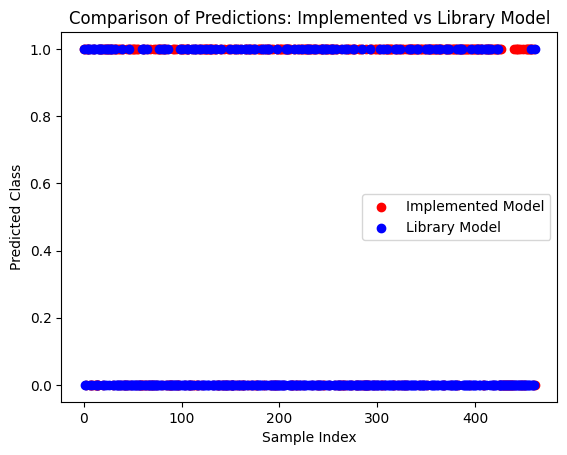

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


# EDA
url = "https://raw.githubusercontent.com/yoga-suhas-km/Intelligent_systems/main/heart_dataset.csv"
df = pd.read_csv(url)


# Percentage of each class (0 and 1)
class_counts = df['chd'].value_counts()
class_percentage = class_counts / df.shape[0] * 100
print("Percentage of class 0:", class_percentage[0])
print("Percentage of class 1:", class_percentage[1])


# Number of missing values
missing_values = df.isnull().sum().sum()
print("Number of missing values:", missing_values)


# Number of categorical variables
categorical_cols = df.select_dtypes(include='object').columns
num_categorical = len(categorical_cols)
print("Number of categorical variables:", num_categorical)


# Correlation matrix
correlation_matrix = df.corr()
max_correlation = correlation_matrix.abs().max().max()
print("Maximum correlation:", max_correlation)


# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)


# Normalize non-categorical features
non_categorical_cols = df.columns.difference(categorical_cols)
df_normalized = df_encoded.copy()
df_normalized[non_categorical_cols] = (df_encoded[non_categorical_cols] - df_encoded[non_categorical_cols].mean()) / df_encoded[non_categorical_cols].std()


#  Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Define the binary cross entropy loss function
def binary_cross_entropy_loss(y, y_hat):
    loss = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    return loss.mean()


# Define the function for updating the weights (thetas) iteratively
def update_weights(X, y, thetas, alpha):
    m = X.shape[0]
    X_with_bias = np.column_stack((np.ones((m, 1)), X))
    y_hat = sigmoid(np.dot(X_with_bias, thetas))
    gradient = np.dot(X_with_bias.T, y_hat - y) / m
    thetas -= alpha * gradient
    return thetas


# Calculate correlation matrix
correlation_matrix = df_normalized.corr()


# Print features with maximum correlation
max_correlated_features = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_correlated_features = max_correlated_features[max_correlated_features != 1.0]
print("Features with Maximum Correlation:")
print(max_correlated_features.head())


# Convert X and y to numpy arrays
X = df_normalized.drop('chd', axis=1).values
y = df['chd'].values


# Initialize random values for theta coefficients
thetas = np.random.rand(X.shape[1] + 1)  # +1 for the bias term


# Plot the cost function for different learning rates
epochs = [500, 1000, 10000]
learning_rates = [0.001, 0.0001]

for lr in learning_rates:
    for epoch in epochs:
        # Initialize random values for theta coefficients for each graph
        thetas = np.random.rand(X.shape[1] + 1)  # +1 for the bias term

        costs = []
        for i in range(epoch):
            thetas = update_weights(X, y, thetas, lr)
            X_with_bias = np.column_stack((np.ones((X.shape[0], 1)), X))
            y_hat = sigmoid(np.dot(X_with_bias, thetas))
            cost = binary_cross_entropy_loss(y, y_hat)
            costs.append(cost)

        plt.plot(range(epoch), costs, label=f"Epochs: {epoch}")

    plt.title(f"Cost Function - Learning Rate: {lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

epochs = [500, 1000, 10000]
learning_rates = [0.001, 0.0001]
batch_size = 50

# Calculate the number of batches
num_batches = X.shape[0] // batch_size

for lr in learning_rates:
    for epoch in epochs:
        # Initialize random values for theta coefficients for each graph
        thetas = np.random.rand(X.shape[1] + 1)  # +1 for the bias term

        costs = []
        for i in range(epoch):
            # Perform mini-batch gradient descent
            for batch in range(num_batches):
                # Get the batch samples
                batch_indices = np.random.choice(X.shape[0], batch_size, replace=False)
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                # Update the weights
                thetas = update_weights(X_batch, y_batch, thetas, lr)

            # Calculate the cost for the entire dataset
            X_with_bias = np.column_stack((np.ones((X.shape[0], 1)), X))
            y_hat = sigmoid(np.dot(X_with_bias, thetas))
            cost = binary_cross_entropy_loss(y, y_hat)
            costs.append(cost)

        plt.plot(range(epoch), costs, label=f"Epochs: {epoch}")

    plt.title(f"Cost Function - Learning Rate: {lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()


# Compare with implemented library
X = df_normalized.drop('chd', axis=1)
y = df['chd'].values

thetas = np.random.rand(X.shape[1] + 1)  # Initialize random values for theta coefficients
X_with_bias = np.column_stack((np.ones((X.shape[0], 1)), X))
lr_model_implemented = sigmoid(np.dot(X_with_bias, thetas)) >= 0.5

# Fit Logistic Regression model using the library implementation
lr_model_library = LogisticRegression(random_state=0)
lr_model_library.fit(X, y)

# Compare the predictions
implemented_predictions = lr_model_implemented.astype(int)
library_predictions = lr_model_library.predict(X)

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the implemented model predictions
ax.scatter(range(len(implemented_predictions)), implemented_predictions, color='red', label='Implemented Model')

# Plot the library model predictions
ax.scatter(range(len(library_predictions)), library_predictions, color='blue', label='Library Model')

# Set the plot labels and title
ax.set_xlabel('Sample Index')
ax.set_ylabel('Predicted Class')
ax.set_title('Comparison of Predictions: Implemented vs Library Model')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()






**Part B: XOR classification problem**

In [ ]:
import numpy as np

# Define the activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class XORNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights with random values
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros((1, self.hidden_size))

        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Calculate the hidden layer output
        self.hidden_layer = sigmoid(np.dot(X, self.weights1) + self.bias1)

        # Calculate the output layer output
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2) + self.bias2)

        return self.output_layer

    def backward(self, X, y, learning_rate):
        # Calculate the gradients using backpropagation

        # Calculate the gradient at the output layer
        delta_output = (self.output_layer - y) * sigmoid_derivative(self.output_layer)

        # Calculate the gradient at the hidden layer
        delta_hidden = np.dot(delta_output, self.weights2.T) * sigmoid_derivative(self.hidden_layer)

        # Update the weights and biases
        self.weights2 -= learning_rate * np.dot(self.hidden_layer.T, delta_output)
        self.bias2 -= learning_rate * np.sum(delta_output, axis=0, keepdims=True)

        self.weights1 -= learning_rate * np.dot(X.T, delta_hidden)
        self.bias1 -= learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)

            # Backward propagation
            self.backward(X, y, learning_rate)

            # Print the loss at every 100 epochs
            if epoch % 100 == 0:
                loss = self.loss(X, y)
                print(f"Epoch: {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        # Perform forward propagation to get the predictions
        return self.forward(X)

    def loss(self, X, y):
        # Calculate the mean squared error loss
        predictions = self.forward(X)
        return np.mean((predictions - y) ** 2)


# Define the XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create an instance of the XOR neural network
model = XORNeuralNetwork(input_size=2, hidden_size=2, output_size=1)
model.train(X, y, epochs=1000, learning_rate=0.1)


# Predict the output for the XOR inputs
predictions = model.predict(X)
print("Predictions:")
print(predictions)


Epoch: 0, Loss: 0.2585
Epoch: 100, Loss: 0.2465
Epoch: 200, Loss: 0.2468
Epoch: 300, Loss: 0.2471
Epoch: 400, Loss: 0.2475
Epoch: 500, Loss: 0.2478
Epoch: 600, Loss: 0.2481
Epoch: 700, Loss: 0.2485
Epoch: 800, Loss: 0.2488
Epoch: 900, Loss: 0.2492
Predictions:
[[0.48543608]
 [0.49521668]
 [0.50595583]
 [0.51336124]]


Let X be the input vector, where X = [x1, x2] represents the two input values for the XOR operation.
Let H be the hidden layer with h1 and h2 as the hidden units.
Let O be the output layer with a single output unit y.

1. Calculation of the hidden layer output:
The hidden layer applies a weighted sum of the inputs followed by a non-linear activation function (sigmoid in this case):

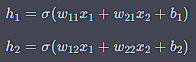


where σ represents the sigmoid activation function.

2. Calculation of the outputer layer output:
The output layer applies a weighted sum of the hidden layer outputs followed by the sigmoid activation function:

image.png
3. Calculation of gradients at the output layer:
The gradients at the output layer are computed using the binary cross-entropy loss function and the derivative of the sigmoid activation function:

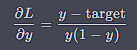

L is the loss function and target is the target output for the XOR operation

4. Calculation of the gradient at the hidden layer:
The gradient at the hidden layer is calculated by backpropagating the gradients from the output layer and using the chain rule:

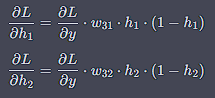

6. Equations for updating the weights and biases:
The weights and biases are updated using gradient descent to minimize the loss function. The update equations are as follows:

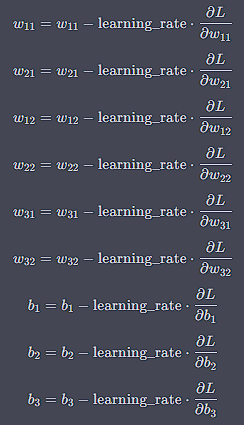

The learning_rate controls the step size for the updates